# Principal Component Analysis with Regression Analysis

In [3]:
#Load the required libraries

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [5]:
#Use Boston dataset
boston = load_boston()
df = pd.DataFrame(data = boston.data)

#Scale the data
scaled = scale(df)
scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [18]:
#Perform PCA without specifying the value of k. 

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled)

#print('Components : ', pca.components_)
print('\nVariance : ', pca.explained_variance_ )
print('\nVariance Ratio: ', pca.explained_variance_ratio_)


Variance :  [6.1389812  1.43611329 1.2450773  0.85927328 0.83646904 0.65870897
 0.5364162  0.39688167 0.27749173 0.22067394 0.18638271 0.16963823
 0.06363502]

Variance Ratio:  [0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]



Scree Plot ------>


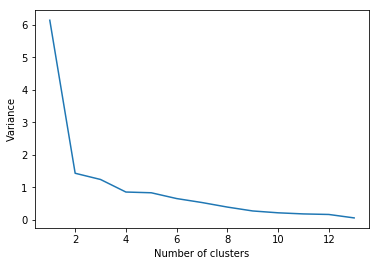

In [19]:
#Scree plot
print('\nScree Plot ------>')
plt.plot(range(1,14), pca.explained_variance_)
plt.xlabel('Number of clusters')
plt.ylabel('Variance')
plt.show()

In [21]:
#Apply k=4 on PCA after finding it from the Scree plot above

pca_new = PCA(n_components=4)
pca_new.fit(scaled)

#Score (Projected values of PCA components)
score = pca_new.fit_transform(scaled)

#New dataframe that contain pca Components
score_df = pd.DataFrame(data=score, columns = ['pca1', 'pca2', 'pca3', 'pca4'])
score_df['pred'] = boston.target

score_df.head()

,pca1,pca2,pca3,pca4,pred
0,-2.098297,0.773113,0.342943,-0.891774,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,21.6
2,-2.074598,0.599639,0.167122,-0.739204,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,36.2


In [32]:
#Linear Regression Without PCA
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.2, random_state = 10)

linearR = LinearRegression().fit(X_train, y_train)
pred = linearR.predict(X_test)
print('RMSE before applying PCA : ', np.sqrt(mean_squared_error(y_test, pred)))
print('R square before applying PCA : ', r2_score(y_test, pred))

RMSE before applying PCA :  5.866341999333012
R square before applying PCA :  0.670933983911564


In [33]:
#Perform Linear Regression on the same after applying PCA

X = score_df.loc[:,'pca1':'pca4']
Y = score_df['pred']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

linearR = LinearRegression().fit(X_train, y_train)
pred = linearR.predict(X_test)

print('RMSE after applying PCA : ', np.sqrt(mean_squared_error(y_test, pred)))
print('R square after applying PCA : ', r2_score(y_test, pred))

RMSE after applying PCA :  6.02596956367646
R square after applying PCA :  0.6527820691798365


In [34]:
# PCA wasn't very useful on this dataset as it increased the RMSE value and decresed R squared value